**PAN CARD TAMPERING DETECTION**

=> The objective of this project is to detect tampering and fake PAN card using
computer vision. This project will help a lot of organizations in detecting whether the Id i.e. the PAN card provided to them by thier employees or customers is original or not.

1. Import necessary libraries

In [ ]:
from skimage.metrics import structural_similarity
# imutils - Finding contours in the image
import imutils
import cv2
from PIL import Image
# requests- Fetch data from URL
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

2. Open and display images along with the format and size

** sample URL given in README file to check for inital working of code **

In [ ]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://yourspj.files.wordpress.com/2011/06/fake-pan-card_yourspj.jpg', stream=True).raw)
print("original image format: ", original.format)
print("tampered image format: ", tampered.format)

print("original image size: ", original.size)
print("tampered image size: ", tampered.size)

original image format:  JPEG
tampered image format:  JPEG
original image size:  (1200, 800)
tampered image size:  (700, 439)


3. Converting the format of tampered image similar to original image.

In [ ]:
original=original.resize((250,150))
print(original.size)
original.save("pan_card_tampering/image/original.png")
tampered= tampered.resize((250,150))
print(tampered.size)
tampered.save("pan_card_tampering/image/tampered.png")

(250, 150)
(250, 150)


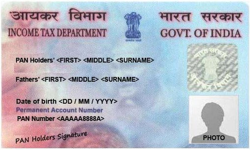

In [ ]:
#display original image
original

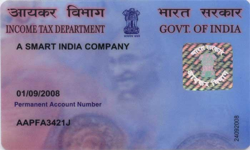

In [ ]:
# display user provided / tampered image
tampered

In [ ]:
#load the two input images
original= cv2.imread("pan_card_tampering/image/original.png")
tampered= cv2.imread("pan_card_tampering/image/tampered.png")

4. Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images and also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel

In [ ]:
#convert the images to gray scale
original_gray= cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray= cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

5. Structural similarity index helps us to determine exactly where in terms of x,y co-ordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [ ]:
# Compute the Structural Similarity Index (SSIM) between the two images
 (score,diff)=structural_similarity(original_gray,tampered_gray,full="True")
diff=(diff*255).astype("uint8")
print("SSIM :",format(score))

SSIM : 0.2824790418904302


6. We are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form of array. This function transforms the grayscale image into a binary image using a mathematical formula.
findContours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. grab_contours grabs the appropriate value of the contours.

In [ ]:
# Calculating threshold and contours
thresh= cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contour= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour= imutils.grab_contours(contour)

In [ ]:
# loop over the contours
for c in contour:
  # applying contours on image
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

7, Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent whether the two images are different or not.

Original format image


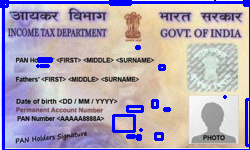

In [ ]:
#Diplay original image with contour
print("Original format image")
Image.fromarray(original)

Tampered format image


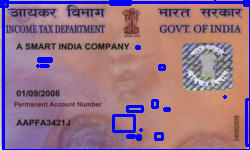

In [ ]:
#Diplay tampered image with contour
print("Tampered format image")
Image.fromarray(tampered)

Difference Image


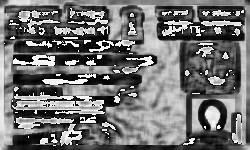

In [ ]:
#Diplay difference image with black
print('Difference Image')
Image.fromarray(diff)

Threshold Image


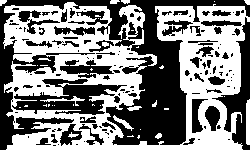

In [ ]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

**SUMMARY**

=> Finding out structural similarity of the images helps us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.

=> As, our SSIM is **~28.2%** we can say that the image user provided is fake or tampered.

=> We visualized the differences and similarities between the images by displaying the images with contours, difference and threshold.

**Future scope of this project**

=> This project can be used by different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID provided is original or fake. Similarly this can be used for any type of ID like aadhar, voter id, etc